# Treating ADCP data

This will be painfull...

In [1]:
## Imports
import matplotlib.pyplot as plt
import matplotlib.path as pth
import matplotlib.patches as patches
import numpy as np
import datetime as dt
from mpl_toolkits.basemap import Basemap
from sklearn import linear_model
import netCDF4 as nc
import datetime as dt
import matplotlib.transforms as mtransforms
from matplotlib.patches import Ellipse, Circle

In [2]:
## Contours
contours_vit = np.load('TrackData/contours_vit_sub.npy').item()
contours_out = np.load('TrackData/contours_out_sub.npy').item()

detections = np.load('TrackData/Detections.npy').item() # contains the date in pynum
# eddies = {'V1':{'ID':3697413,'box':[(0,5),(-35,-30)]},
#           'V3':{'ID':3699716,'box':[(-14,-7.5),(-31,-26)]},
#           'M10':{'ID':3810383,'box':[(-12.5,-7.5),(-34.5,-29.5)]},
#           'M12':{'ID':3812686,'box':[(-26.5,-22),(-30,-25)]}}


In [3]:
## SSH
file = nc.Dataset('SSHfields/global-analysis-forecast-phy-001-024_1522088461261.nc') # contains dates in netcdf num

In [4]:
def ADCP_surf(eddy,ADCPdata,SSHdata=file,contours=contours_vit,detections=detections,save=False):
    '''
    Returns a figure with the quiver plot of velocities at required depth along cruise track on selected eddy
    eddie is a string
    ADCPdata is a dict of the good shape
    depth is a float or integer
    '''
    ## Useful variables
    ID = eddies[eddy]['ID']
    box = eddies[eddy]['box']
    lgmin = box[0][0]
    lgmax = box[0][1]
    ltmin = box[1][0]
    ltmax = box[1][1]
    grid = 2
    index_dtc = np.where(detections['IDs'] == ID)
    date = dt.datetime.fromordinal(detections['Dates'][index_dtc][0])
    dptmax = 150
    dptmin = 50
    ## Retrieving ADT field
    date = nc.date2num(date,'hours since 1950-01-01 12:00:00')
    index = np.where(file['time'][:] == date)[0][0]
    sshlon = file['longitude'][:]
    sshlat = file['latitude'][:]
    adt = file['zos'][index,:,:]
    X,Y = np.meshgrid(sshlon,sshlat)
    ## Center of detection
    xcenter = detections['Xs'][index_dtc]
    ycenter = detections['Ys'][index_dtc]
    ## Retrieving contour
    contour = contours[ID]
    xc = contour['X']
    yc = contour['Y']
    ## Retrieving ADCP data
    longitudes = ADCPdata['longitudes']
    latitudes = ADCPdata['latitudes']
    dinf = ADCPdata['depths'] < dptmax
    dsup = ADCPdata['depths'] > dptmin
    indexes = np.where(dinf == dsup)[0]
    U = ADCPdata['U'][:,indexes].mean(axis=1)
    V = ADCPdata['V'][:,indexes].mean(axis=1)
    ## Setting up the projection
    m = Basemap(projection='merc',llcrnrlat=ltmin,urcrnrlat=ltmax,llcrnrlon=lgmin,urcrnrlon=lgmax,resolution='c')
    Xc,Yc = m(xc,yc)
    Xcenter,Ycenter = m(xcenter,ycenter)
    ## Plotting
    plt.figure(figsize = (10,10))
    # ADT field
    mesh = m.pcolormesh(X,Y,adt,cmap = plt.cm.jet,latlon=True)
    mesh.set_clim(vmin = -0.05, vmax = 0.4)
    cbar = plt.colorbar(mesh,ticks = np.arange(-0.05,0.41,.1))
    cbar.set_label('ADT (m)')
    # Contour
    plt.plot(Xc,Yc)
    # Center
    plt.plot(Xcenter,Ycenter,'*',ms=5)
    # Quiver
    Q = m.quiver(longitudes,latitudes,U,V,latlon=True,scale=5,pivot='tail',width=0.001)
    xleg = lgmin + 0.7
    yleg = ltmin + 0.1
    x,y = m(xleg,yleg)
    plt.quiverkey(Q,x,y,1, '1 m/s', coordinates='data')
    x,y = m(longitudes,latitudes)
    plt.plot(x,y,ms=0.2)
    # Meridians and parallels
    parallels=np.arange(ltmin,ltmax,grid)
    meridians=np.arange(lgmin,lgmax,grid)
    m.drawparallels(parallels,labels=[1,0,0,0],color='grey')
    m.drawmeridians(meridians,labels=[0,0,0,1],color='grey')
    # Coastlines
    m.drawcoastlines()
    # Title
    title = 'Velocity averaged between ' + str(dptmin) + ' and ' + str(dptmax) + 'm around eddy ' + eddy
    plt.title(title)
    # Showing/saving
    if save:
        filename = 'Velocity_' + str(dptmin) + '_' + str(dptmax) + '_' + eddy+'.png'
        plt.savefig(filename)
    plt.show()


## First, the FORSA data

In [9]:
path1 = '/home/affholder/Documents/Stage/Araujo/Eddie_Tracks/FORSA_Data/FORSA_data/ADCP/'
path2 = '/home/affholder/Documents/ENS/AFC/Stage/Araujo/Eddie_Tracks/FORSA_Data/FORSA_data/ADCP/'
path = path1

In [100]:
filename = '151701.dat'

Time for an explanation of how the data is formatted:

In [101]:
datafile = open(path+filename)
lines = datafile.readlines()

In [89]:
# Columns
print(lines[0].strip().split('\t'))

['data_hora', 'latitude', 'longitude', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc', 'cota', 'veloc', 'direc',

We see that each line of the data will be a date+hour, latitude, longitude, and then a list of couples depth, velocity and direction (what the hell is this direction, an azimuth? we'll see, direction is in degrees with 0 to the north)

With a whole lot of NaNs...

Making a nice list of lists (each list is a line)

In [102]:
temp = []
for i in range(len(lines)):
    line = lines[i].strip().split('\t')
    temp.append(line)

In [109]:
temp[3][0]

'28/06/2015 00:06:17'

We will now translate this into a nice dictionnary (thanks numpy for your clean data format <3 )

In [110]:
file_keys = np.array(temp[0])
depth_idx = np.where(file_keys == 'cota') # The depths are always the same
veloc_idx = np.where(file_keys == 'veloc')
direc_idx = np.where(file_keys == 'direc')
depths = np.array(np.array(temp[1])[depth_idx],dtype=float)
ADCP_F = dict()
longitudes = []
latitudes = []
directions = []
velocities = []
dates = []
dnum = []
Us = []
Vs = []
for i in range(1,len(temp)):
    veloc = np.array(np.array(temp[i])[veloc_idx],dtype=float)
    direc = np.array(np.array(temp[i])[direc_idx],dtype=float)
    direc_rad = np.deg2rad(direc + 90) # repère trigo 0 à droite
    U = veloc * np.cos(direc_rad)
    V = veloc * np.sin(direc_rad)
    longitude = np.float(temp[i][2])
    latitude = np.float(temp[i][1])
    date_hour_string = temp[i][0]
    date = dt.datetime.strptime(temp[i][0],'%d/%m/%Y %H:%M:%S')
    datenum = dt.datetime.toordinal(date) #this is just the day, not the hour
    longitudes.append(longitude)
    latitudes.append(latitude)
    dates.append(date)
    dnum.append(datenum)
    velocities.append(veloc)
    directions.append(direc)
    Us.append(U)
    Vs.append(V)
ADCP_F['depths'] = depths
ADCP_F['longitudes'] = np.array(longitudes)
ADCP_F['latitudes'] = np.array(latitudes)
ADCP_F['dates'] = np.array(dates)
ADCP_F['datenum'] = np.array(dnum)
ADCP_F['directions'] = np.array(directions)
ADCP_F['velocities'] = np.array(velocities)
ADCP_F['U'] = np.array(Us)
ADCP_F['V'] = np.array(Vs)
# Zt,nlon,nlat,fitted_Z,x = Add_Vorticity(ADCP_F)
# ADCP_F['Vorticity'] = Zt
# ADCP_F['d_longitudes'] = nlon
# ADCP_F['d_latitudes'] = nlat
# ADCP_F['Smoothed Vorticity'] = fitted_Z
# ADCP_F['Smoothed Depths'] = x


In [111]:
np.save(path+'ADCP_FORSA',ADCP_F)

In [10]:
ADCP_F = np.load(path+'ADCP_FORSA.npy').item()

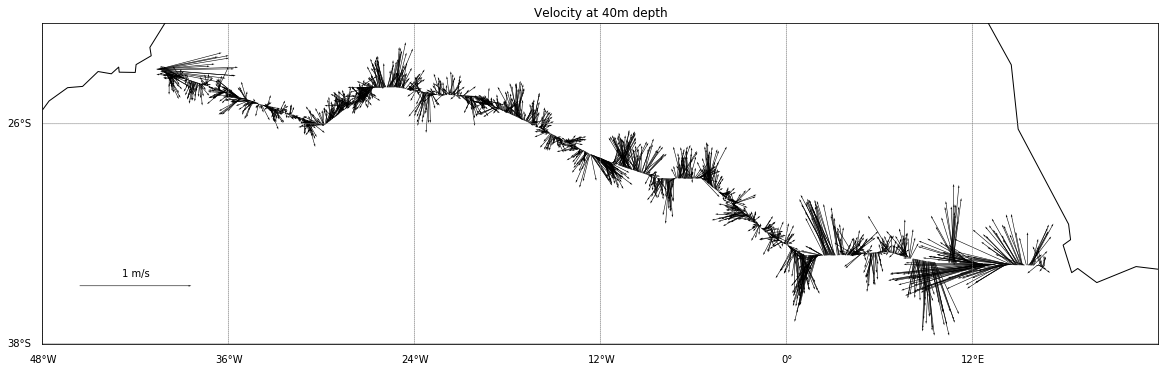

In [16]:
depth = 72
lonmin = -48
lonmax = 24
latmin = -38
latmax = -20
grid = 12
ADCP = ADCP_F
fig = plt.figure(figsize=(20,16))
m = Basemap(projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='c')
# m.bluemarble()
m.drawcoastlines()
longitudes = ADCP['longitudes']
latitudes = ADCP['latitudes']
x,y = m(longitudes,latitudes)
idx_depth = np.where(ADCP['depths'] == depth)[0][0]
U = ADCP['U'][:,idx_depth]
V = ADCP['V'][:,idx_depth]
parallels=np.arange(latmin,latmax,grid)
meridians=np.arange(lonmin,lonmax,grid)
m.drawparallels(parallels,labels=[1,0,0,0],color='grey')
m.drawmeridians(meridians,labels=[0,0,0,1],color='grey')
Q = m.quiver(longitudes,latitudes,U,V,latlon=True,scale=10,pivot='tail',width=0.0005)
xleg = -42
yleg = -35
x,y = m(xleg,yleg)
plt.quiverkey(Q,x,y,1, '1 m/s', coordinates='data')
plt.title('Velocity at 40m depth')
plt.savefig('ADCP_FORSA_40m.pdf')
plt.show()

### Eddy V1

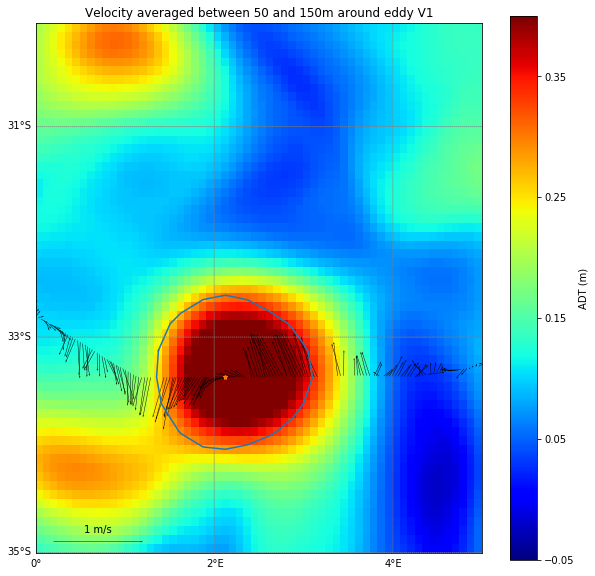

In [315]:
ADCP_surf('V1',ADCP_F,save=False)

In [314]:
eddies['M12']['Y_center']

array([-27.06748351])

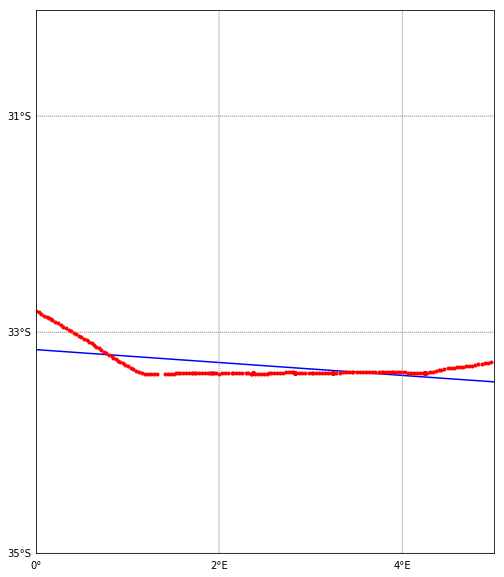

In [18]:
lonmin = 0
lonmax = 5
latmin = -35
latmax = -30
grid = 2
lon = ADCP['longitudes']
lat = ADCP['latitudes']
lonmin_bool = lon <= lonmax
lonmax_bool = lon >= lonmin
latmin_bool = lat <= latmax
latmax_bool = lat >= latmin
lon_idx = np.where(lonmax_bool == lonmin_bool)[0]
lat_idx = np.where(latmax_bool == latmin_bool)[0]
minlen = min(len(lon_idx),len(lat_idx))
if len(lon_idx) == minlen:
    idx = lon_idx
elif len(lat_idx) == minlen:
    idx = lat_idx
sublon = lon[idx]
sublat = lat[idx]

plt.figure(figsize=(10,10))
m = Basemap(projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='c')
x,y = m(sublon,sublat) #in order to make the linear regression in the projected plane

regr = linear_model.LinearRegression()
regr.fit(x.reshape(len(x),1), y.reshape(len(y),1))
b = regr.coef_[0,0]
a = regr.predict(0)[0,0]

xtest,ytest = m(np.array([lonmin,lonmax]),np.array([latmin,latmax]))
ytest = regr.predict(xtest.reshape(len(xtest),1))

m.drawcoastlines()

plt.plot(xtest,ytest,'b') #line on which orthogonal projection is made
lln,llt = m(sublon,sublat)
plt.plot(lln,llt,'.r')
projx,projy = proj(a,b,lln,llt)
# plt.plot(projx,projy,'*r')
parallels=np.arange(latmin,latmax,grid)
meridians=np.arange(lonmin,lonmax,grid)
m.drawparallels(parallels,labels=[1,0,0,0],color='grey')
m.drawmeridians(meridians,labels=[0,0,0,1],color='grey')
plt.show()

Ok so now I have my line on which I project everything

First lets just plot the speed norm on the line

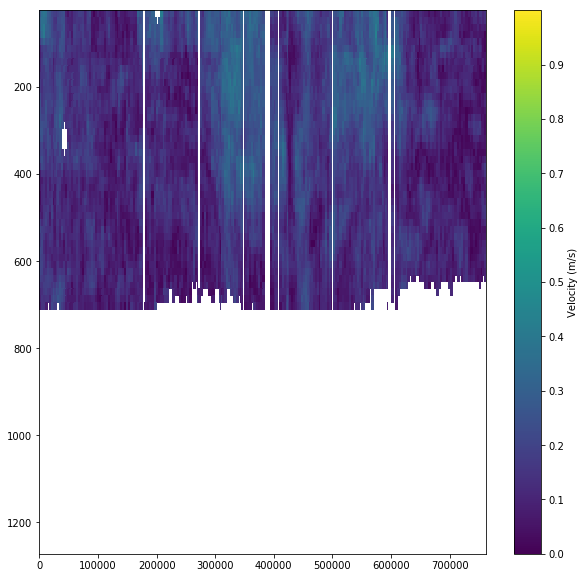

In [44]:
# Subsetting the data
box = eddies['V3']['box']
lonmin = box[0][0]
lonmax = box[0][1]
latmin = box[1][0]
latmax = box[1][1]
subadcp = Subsetter(box,ADCP_F)
# depths = subadcp['depths']
depths = subadcp['depths']
velocities = subadcp['velocities']
lons = subadcp['longitudes']
lats = subadcp['latitudes']
# vorticity = subadcp['Vorticity']
# vorticity = subadcp['Smoothed Vorticity']

# Projection of the data on a map (mercator coordinates)
m = Basemap(projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='c')
x,y = m(lons,lats)
# Orthogonal projection of the data on the regression line
regr = linear_model.LinearRegression()
regr.fit(x.reshape(len(x),1), y.reshape(len(y),1))
b = regr.coef_[0,0]
a = regr.predict(0)[0,0]
projx,projy = proj(a,b,x,y)
dists = distances(projx,projy)
# Make the scalar field that can be plotted
DST,DPT = np.meshgrid(dists,depths)
plt.figure(figsize=(10,10))
lvl = [0]
mesh = plt.pcolormesh(DST,DPT,np.transpose(velocities))
mesh.set_clim(vmin=0, vmax=1)
cbar=plt.colorbar(mesh,ticks=np.arange(0,1,.1))
cbar.set_label('Velocity (m/s)')
plt.gca().invert_yaxis()
plt.show()


## Now the Meteor data

In [11]:
path3 = '/home/affholder/Documents/Stage/Araujo/Eddie_Tracks/M124_Data/ADCP/'
path4 = '/home/affholder/Documents/ENS/AFC/Stage/Araujo/Eddie_Tracks/M124_Data/ADCP/'
path = path3

In [161]:
# filename = 'M124_ADCP_75khz.txt'
filename = 'M124_ADCP_38khz.txt'

In [162]:
datafile = open(path+filename)
lines = datafile.readlines()

In [163]:
# Columns
print(lines[0].strip().split('\t'))

['datenum_mat', 'longitude', 'latitude', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 'U', 'V', 'depth', 

Here the date is in number of days since 01/01/2016 00:00

In [164]:
temp = []
for i in range(len(lines)):
    line = lines[i].strip().split('\t')
    temp.append(line)

In [165]:
temp[1][0]

'59.6708'

In [166]:
file_keys = np.array(temp[0])
depth_idx = np.where(file_keys == 'depth') # The depths are always the same
u_idx = np.where(file_keys == 'U')
v_idx = np.where(file_keys == 'V')
depths = np.array(np.array(temp[1])[depth_idx],dtype=float)
ADCP_M75 = dict()
longitudes = []
latitudes = []
directions = []
velocities = []
dates = []
dnum = []
Us = []
Vs = []
ref_date = dt.datetime(2016,1,1,0,0,0)
for i in range(1,len(temp)):
    u = np.array(np.array(temp[i])[u_idx],dtype=float)
    v = np.array(np.array(temp[i])[v_idx],dtype=float)
    direc = np.angle(u+v*1j,deg=True)
    veloc = np.sqrt(u**2 + v**2)
    longitude = np.float(temp[i][1])
    latitude = np.float(temp[i][2])
#     date_hour_string = temp[i][0]
    time = float(temp[i][0])
    date = ref + dt.timedelta(time)
    ## transform the date from ugly matlab (? with unknown reference) to python
    longitudes.append(longitude)
    latitudes.append(latitude)
    dates.append(date)
#     dnum.append(datenum)
    velocities.append(veloc)
    directions.append(direc)
    Us.append(u)
    Vs.append(v)
nan_idx = np.where(np.isnan(longitudes))[0]
longitudes = np.delete(longitudes,nan_idx)
latitudes = np.delete(latitudes,nan_idx)
dates = np.delete(dates,nan_idx)
directions = np.delete(directions,nan_idx,0)
velocities = np.delete(velocities,nan_idx,0)
Us = np.delete(Us,nan_idx,0)
Vs = np.delete(Vs,nan_idx,0)
ADCP_M75['depths'] = depths
ADCP_M75['longitudes'] = np.array(longitudes)
ADCP_M75['latitudes'] = np.array(latitudes)
ADCP_M75['dates'] = np.array(dates)
# ADCP_M38['datenum'] = np.array(dnum)
ADCP_M75['directions'] = np.array(directions)
ADCP_M75['velocities'] = np.array(velocities)
ADCP_M75['U'] = np.array(Us)
ADCP_M75['V'] = np.array(Vs)
# Zt,nlon,nlat,fitted_Z,sdepths = Add_Vorticity(ADCP_M75)
# ADCP_M38['Vorticity'] = Zt
# ADCP_M38['d_longitudes'] = nlon
# ADCP_M38['d_latitudes'] = nlat
# ADCP_M38['Smoothed Vorticity'] = fitted_Z
# ADCP_M38['Smoothed Depths'] = sdepths

In [167]:
np.save(path + 'ADCP_M38',ADCP_M75)

In [12]:
ADCP_M38 = np.load(path + 'ADCP_M38.npy').item()
ADCP_M75 = np.load(path + 'ADCP_M75.npy').item()

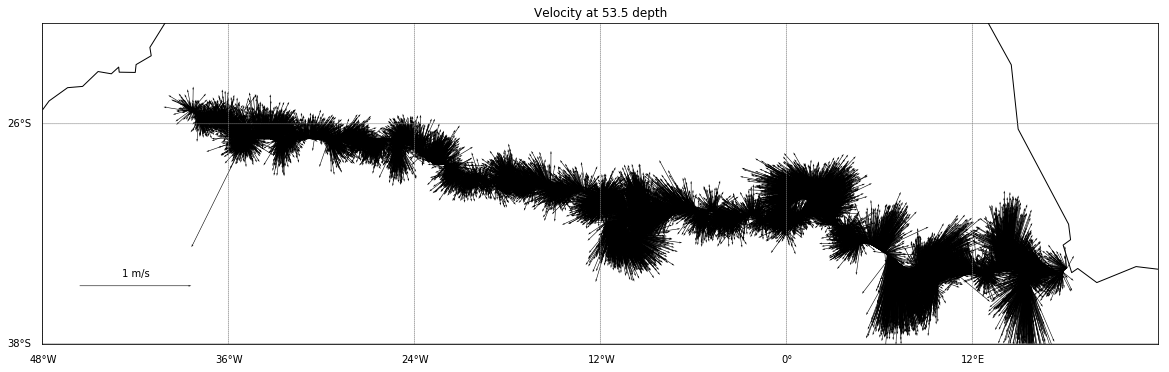

In [29]:
depth = 53.5
lonmin = -48
lonmax = 24
latmin = -38
latmax = -20
grid = 12
MADCP = ADCP_M38
fig = plt.figure(figsize=(20,16))
m = Basemap(projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='c')
# m.bluemarble()
m.drawcoastlines()
longitudes = MADCP['longitudes']
latitudes = MADCP['latitudes']
x,y = m(longitudes,latitudes)
idx_depth = np.where(MADCP['depths'] == depth)[0][0]
U = MADCP['U'][:,idx_depth]
V = MADCP['V'][:,idx_depth]
parallels=np.arange(latmin,latmax,grid)
meridians=np.arange(lonmin,lonmax,grid)
m.drawparallels(parallels,labels=[1,0,0,0],color='grey')
m.drawmeridians(meridians,labels=[0,0,0,1],color='grey')
Q = m.quiver(longitudes,latitudes,U,V,latlon=True,scale=10,pivot='tail',width=0.0005)
xleg = -42
yleg = -35
x,y = m(xleg,yleg)
plt.quiverkey(Q,x,y,1, '1 m/s', coordinates='data')
plt.title('Velocity at ' + str(depth) + ' depth')
# plt.savefig('ADCP_METEOR_17m.pdf')
plt.show()

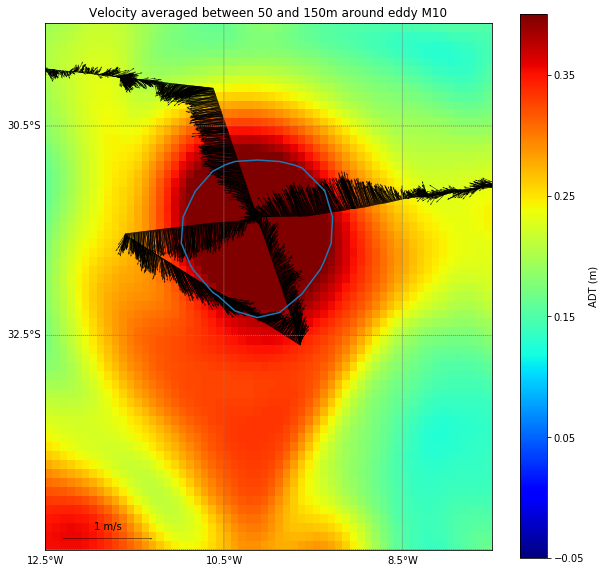

In [30]:
ADCP_surf('M10',ADCP_M38,save=True)

In [31]:
lon = ADCP_M38['longitudes']
lat = ADCP_M38['latitudes']

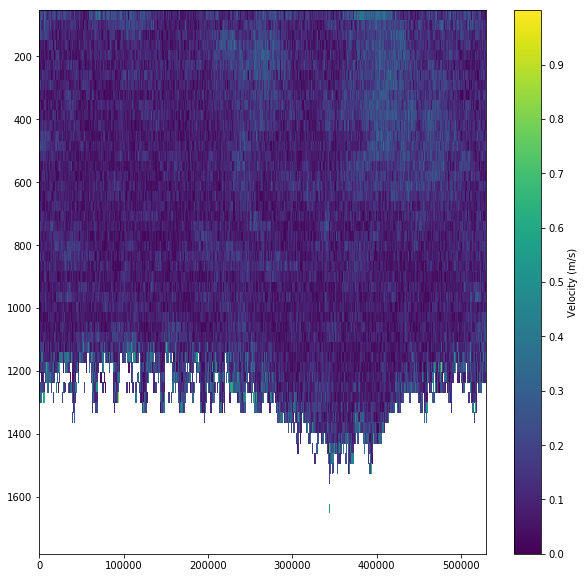

In [40]:
# Subsetting the data
box = eddies['M12']['box']
lonmin = box[0][0]
lonmax = box[0][1]
latmin = box[1][0]
latmax = box[1][1]
subadcp = Subsetter(box,ADCP_M38)
depths = subadcp['depths']
lons = subadcp['longitudes']
lats = subadcp['latitudes']
velocities = subadcp['velocities']

# Projection of the data on a map (mercator coordinates)
m = Basemap(projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='c')
x,y = m(lons,lats)
# Orthogonal projection of the data on the regression line
regr = linear_model.LinearRegression()
regr.fit(x.reshape(len(x),1), y.reshape(len(y),1))
b = regr.coef_[0,0]
a = regr.predict(0)[0,0]
projx,projy = proj(a,b,x,y)
dists = distances(projx,projy)
# Make the scalar field that can be plotted
DST,DPT = np.meshgrid(dists,depths)

plt.figure(figsize=(10,10))
mesh = plt.pcolor(DST,DPT,np.transpose(velocities))
mesh.set_clim(vmin=0, vmax=1)
cbar=plt.colorbar(mesh,ticks=np.arange(0,1,.1))
cbar.set_label('Velocity (m/s)')
plt.gca().invert_yaxis()
plt.show()

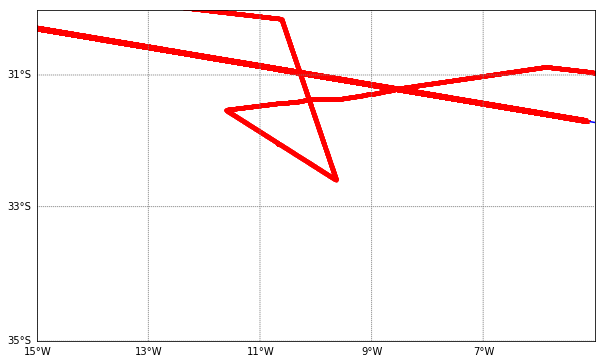

In [46]:
lonmin = -15
lonmax = -5
latmin = -35
latmax = -30
grid = 2
lon = ADCP_M38['longitudes']
lat = ADCP_M38['latitudes']
lonmin_bool = lon <= lonmax
lonmax_bool = lon >= lonmin
latmin_bool = lat <= latmax
latmax_bool = lat >= latmin
lon_idx = np.where(lonmax_bool == lonmin_bool)[0]
lat_idx = np.where(latmax_bool == latmin_bool)[0]
minlen = min(len(lon_idx),len(lat_idx))
if len(lon_idx) == minlen:
    idx = lon_idx
elif len(lat_idx) == minlen:
    idx = lat_idx
sublon = lon[idx]
sublat = lat[idx]

plt.figure(figsize=(10,10))
m = Basemap(projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='c')
x,y = m(sublon,sublat) #in order to make the linear regression in the projected plane

regr = linear_model.LinearRegression()
regr.fit(x.reshape(len(x),1), y.reshape(len(y),1))
b = regr.coef_[0,0]
a = regr.predict(0)[0,0]

xtest,ytest = m(np.array([lonmin,lonmax]),np.array([latmin,latmax]))
ytest = regr.predict(xtest.reshape(len(xtest),1))

m.drawcoastlines()

plt.plot(xtest,ytest,'b') #line on which orthogonal projection is made
lln,llt = m(sublon,sublat)
plt.plot(lln,llt,'.r')
projx,projy = proj(a,b,lln,llt)
plt.plot(projx,projy,'*r')
parallels=np.arange(latmin,latmax,grid)
meridians=np.arange(lonmin,lonmax,grid)
m.drawparallels(parallels,labels=[1,0,0,0],color='grey')
m.drawmeridians(meridians,labels=[0,0,0,1],color='grey')
plt.show()

## Analysis of the vorticity

The smoothed vorticity has a lot of problems...

For now, I think that I should design a function that gets all the points inside the contour
then that makes a "circular eddy" equivalent to the given contour
then that computes the radial vorticity:
$$
\zeta = \frac{1}{r} \frac{\partial r V}{\partial r}
$$

Okay, so methodology here comes from \textit{H.M. van Aken et al} 2003:
\begin{itemize}
\item Take the NE component of the velocity (see orthogonal projection)
\item Plot it, make a linear regression to obtain velocities under solid rotation assumption
\item Project this solid rotation velocities on tangent to circles
\item Compute radial vorticity
\end{itemize}
All of this is done for every depths to obtain a depth profile of the vorticity
![image.png](attachment:image.png)

First, I think I should use Remi's data to take the points that are inside the structure

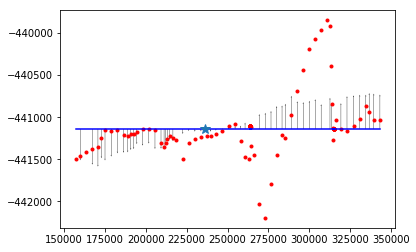

In [361]:
plt.plot(x,y,'.r')
plt.plot(px,py,'b')
plt.plot(x_center,y_center,'*',ms=10)
plt.quiver(px,py,np.zeros(len(nV[:,1])),nV[:,10],scale=5,pivot='tail',width=0.001)
plt.show()

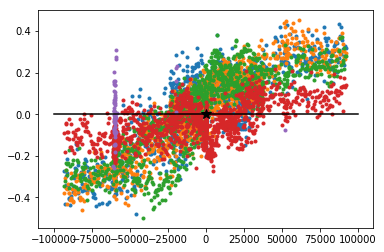

In [147]:
# Plot to demonstrate where we are (1st plot in the Aken figures)
# plt.figure(figsize=(10,10))
#depths = [24,104,504,920,1272]
# depths = [25.5,105.5,401.5]
depths = [53.5,117.5,501.5,949.5,1685.5]
for dpth in depths:
    index = np.where(ADCP['depths'] == dpth)[0][0]
    plt.plot(nX,nV[:,index],'.')
plt.plot([-100000,100000],[0,0],'k')
plt.plot(0,0,'k*',ms=10)
plt.show()

In [148]:
# ed = list(eddies.keys())
# data = [ADCP_V1,ADCP_V3,ADCP_M10,ADCP_]
coeffs = []
scores = []
omegas = []
for i in range(len(ADCP['depths'])):
    veloc = nV[:,i]
    idx = np.isfinite(nX) & np.isfinite(veloc)
    if sum(idx) == 0:
        coeffs.append((np.nan,np.nan))
        scores.append(np.nan)
        omegas.append(np.nan)
    else:
        x = nX[idx]
        y = veloc[idx]
        regr = linear_model.LinearRegression()
        regr.fit(x.reshape(len(x),1), y.reshape(len(y),1))
        b = regr.coef_[0,0]
        a = regr.predict(0)[0,0]
        omega = np.arctan(b)
        s = regr.score(x.reshape(len(x),1), y.reshape(len(y),1))
        coeffs.append((a,b))
        scores.append(s)
        omegas.append(omega)
Z = []
for j in range(len(nX)):
    Vs = nV[j,:]
    Bs = Vs/nX[j]
    zetas = np.arctan(Bs)
    Z.append(zetas)
Z = np.array(Z)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


## Another Poor man's vorticity, no regression

In [13]:
eddies = np.load('Scripts/eddies_complete.npy').item()

In [14]:
x = eddies['V1']['ADCP']['Eddy X']
v = np.transpose(eddies['V1']['ADCP']['Eddy V'])
z = eddies['V1']['ADCP']['depths']

In [15]:
X,Z = np.meshgrid(x,z)

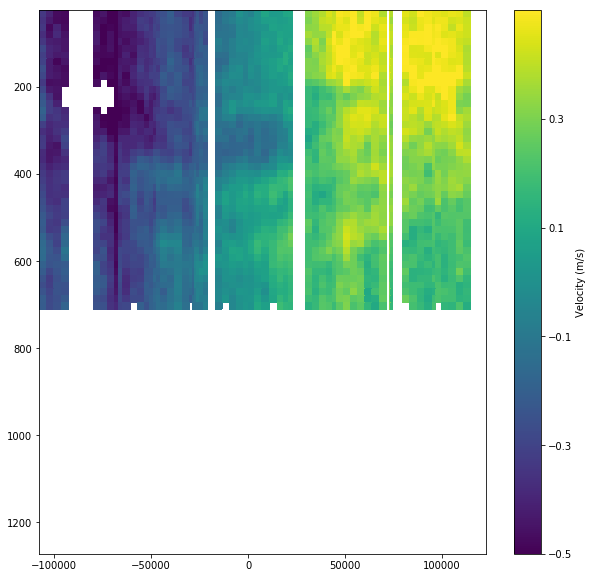

In [16]:
plt.figure(figsize=(10,10))
mesh = plt.pcolormesh(X,Z,v,)
mesh.set_clim(vmin=-0.5, vmax=0.5)
cbar=plt.colorbar(mesh,ticks=np.arange(-0.5,0.5,.2))
cbar.set_label('Velocity (m/s)')
plt.gca().invert_yaxis()
plt.show()

In [17]:
def BoxCarFilter(M,bins_x,bins_y):
    """
    Boxcar filter, or blur
    Every point is the average of the box x_len,ylen
    X is horizontal 1D array
    Y is vertical 1D array
    M is the field matrix of size = (len(X),len(Y))
    bins_x is the HALF of the horizontal size of the box in bins
    bins_y is the HALF of the vertical size of the box in bins
    """
    xl,yl = M.shape
    Mp = np.zeros((xl,yl))
    for i in range(xl):
        for j in range(yl):
            xmin = i - bins_x
            ymin = j - bins_y
            xmax = i + bins_x
            ymax = j + bins_y
            
            if xmin < 0:
                xmin = 0
            if ymin < 0:
                ymin = 0
            if xmax > xl:
                xmax = -1
            if ymax > yl:
                ymax = -1
            if np.isnan(M[i,j]):
                avg = np.nan
            else:
                box = M[xmin : xmax, ymin : ymax]
                avg = np.nanmean(box)
            Mp[i,j] = avg
    return(Mp)

1 z bin is approx 32m

In [44]:
len(x)

488

In [45]:
x[3]-x[2]

411.42103485314874

1 x bin is approx 400m

Joyce et al 2013 recommend 130m vertical and 10km hztal, therefore
for M124 20bins x and 4bins z are chosen  
for FORSA 4 bind x and 10 bins 

In [11]:
v.shape

(55, 920)

In [12]:
len(v[:,0])

55

In [181]:
v_filt = BoxCarFilter(v,2,5)

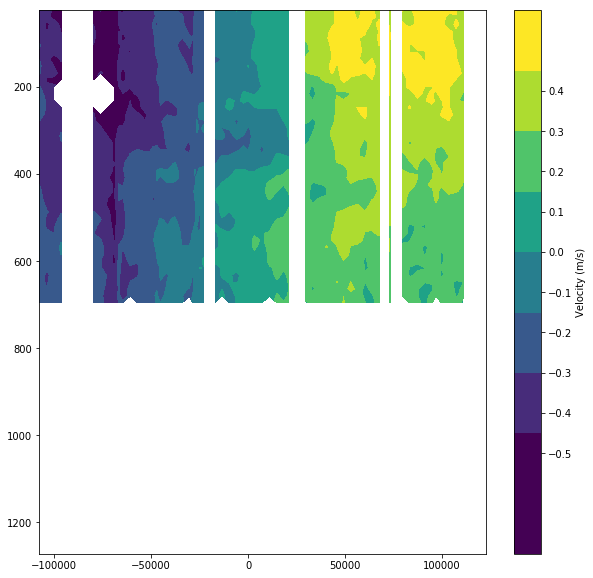

In [18]:
plt.figure(figsize=(10,10))
mesh = plt.contourf(X,Z,v)
mesh.set_clim(vmin=-0.5, vmax=0.5)
cbar=plt.colorbar(mesh,ticks=np.arange(-0.5,0.5,.1))
cbar.set_label('Velocity (m/s)')
plt.gca().invert_yaxis()
plt.show()

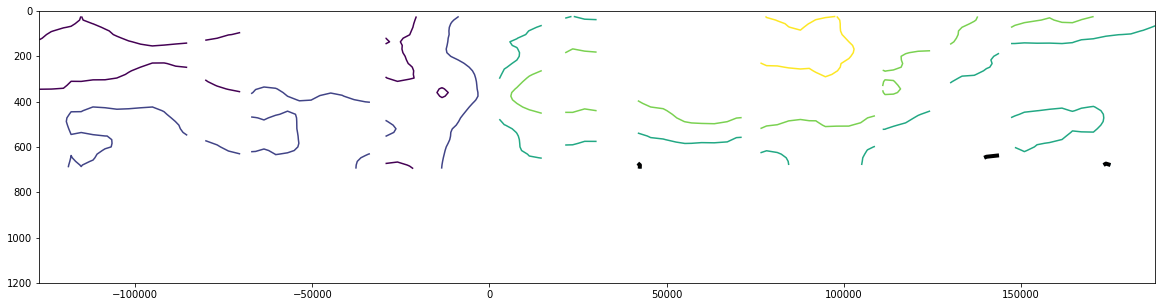

In [19]:
eddy = 'V3'
# Only half the bins
if eddy == 'V1' or eddy == 'V3':
    zbins = 5
    xbins = 2
else:
    zbins = 5
    xbins = 10
x = eddies[eddy]['ADCP']['Eddy X']
v = np.transpose(eddies[eddy]['ADCP']['Eddy V'])
z = eddies[eddy]['ADCP']['depths']
X,Z = np.meshgrid(x,z)
v_filt = BoxCarFilter(v,zbins,xbins) #because v is transposed
plt.figure(figsize=(20,5))
levels = np.arange(-1,1,0.1) #[-0.3,-0.2,-0.1,0,0.1,0.2,0.3]
#clrs = ['darkblue','azure','aquamarine','black','gold','orange','orangered']
plt.contour(X,Z,v_filt,levels=levels)
cs = plt.contour(X,Z,v_filt,levels=[0],colors='black')
zc = cs.collections[0]
plt.setp(zc, linewidth=4)
plt.ylim(0,1200)
# plt.xlim(-60000,20000)
plt.gca().invert_yaxis()
plt.show()

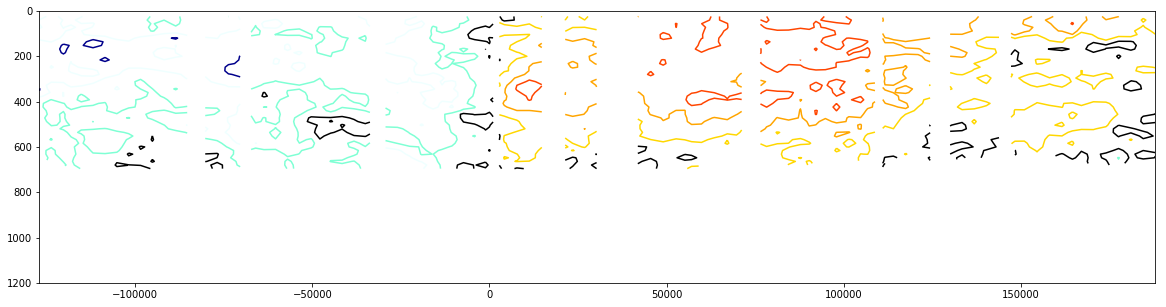

In [20]:
plt.figure(figsize=(20,5))
levels = [-0.3,-0.2,-0.1,0,0.1,0.2,0.3]
clrs = ['darkblue','azure','aquamarine','black','gold','orange','orangered']
plt.contour(X,Z,v,levels=levels,colors=clrs)
plt.ylim(0,1200)
# plt.xlim(-60000,20000)
plt.gca().invert_yaxis()
plt.show()

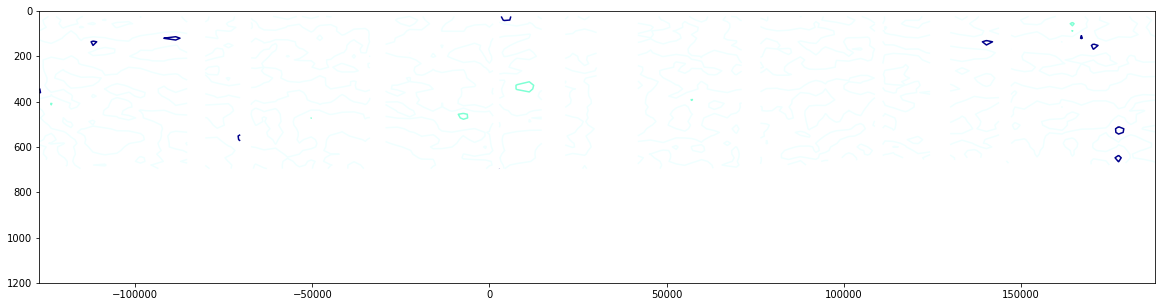

In [21]:
plt.figure(figsize=(20,5))
levels = [-0.3,-0.2,-0.1,0,0.1,0.2,0.3]
clrs = ['darkblue','azure','aquamarine','black','gold','orange','orangered']
plt.contour(X,Z,v - v_filt,levels=levels,colors=clrs)
plt.ylim(0,1200)
# plt.xlim(-60000,20000)
plt.gca().invert_yaxis()
plt.show()

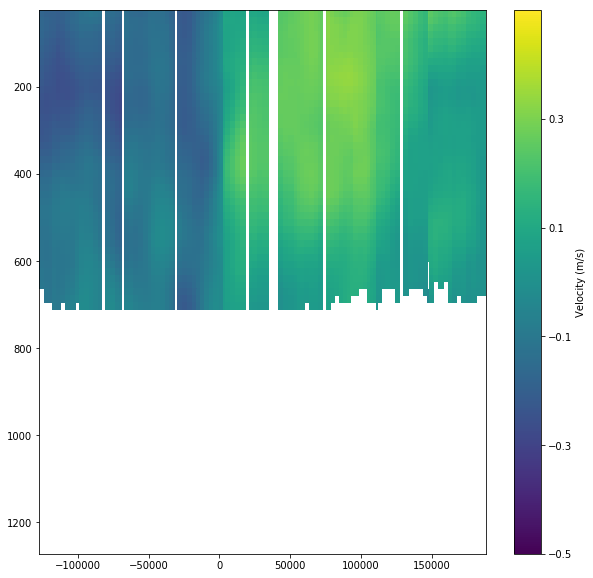

In [22]:
plt.figure(figsize=(10,10))
mesh = plt.pcolormesh(X,Z,v_filt)
mesh.set_clim(vmin=-0.5, vmax=0.5)
cbar=plt.colorbar(mesh,ticks=np.arange(-0.5,0.5,.2))
cbar.set_label('Velocity (m/s)')
plt.gca().invert_yaxis()
plt.show()

In [23]:
def RadialVorticity(v,x):
    '''
    Poor man's vorticity
    '''
    zeta = []
    for j in range(len(x)):
        Vs = v[j,:]
        Bs = Vs/x[j]
        zetas = 2*np.arctan(Bs)
        zeta.append(zetas)
    zeta = np.array(zeta)
    return(zeta)

In [24]:
zeta = RadialVorticity(np.transpose(v_filt),x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


In [25]:
np.where(x == 0)

(array([], dtype=int64),)

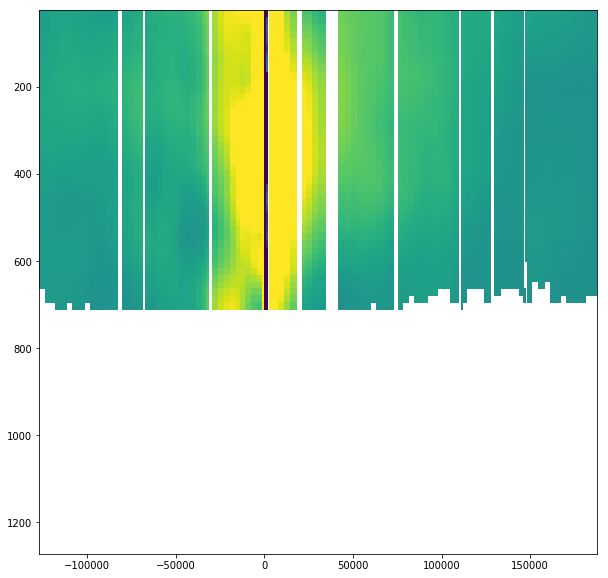

In [26]:
plt.figure(figsize=(10,10))
mesh = plt.pcolormesh(X,Z,np.transpose(zeta))
mesh.set_clim(vmin=-2e-5, vmax=2e-5)
# cbar=plt.colorbar(mesh,ticks=np.arange(-0.5,0.5,.2))
# cbar.set_label('Velocity (m/s)')
plt.gca().invert_yaxis()
plt.show()

## Find the virtual center
Two options  
- hodographs
- linear regressions at every depths

### Hodographs

In [125]:
eddy = 'V3'
ADCP = eddies[eddy]['ADCP']

In [126]:
index = np.where(ADCP['depths'] < 350)[0]

In [127]:
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [129]:
mU = np.nanmean(ADCP['U'][:,index],axis=1)
mV = np.nanmean(ADCP['V'][:,index],axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [188]:

def Hodograph(U,V,deltat,orientation='EW',eddy='A'):
    '''
    Makes an hodograph
    '''
    ## Initialization
    # Create figure
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    # Set axis limits, in order to see circle aspect MUST be set to equal
    ax.set_xlim(-8,8)
    ax.set_ylim(-8,8)
    ax.set_aspect('equal')
    # Make the axis disappear
    ax.spines['left'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.yaxis.set_ticks([])
    ax.xaxis.set_ticks([])
    # Create ticks for the new axis and set their position
    x_ticks = np.arange(0.2,8,2.2)*np.cos(np.pi/6)
    y_ticks = np.arange(0.2,8,2.2)*np.sin(np.pi/6)
    ticks = np.array(np.arange(0,8,2),dtype=str)
    # Plot the ticks
    for j in range(len(x_ticks)):
        ax.text(x_ticks[j],y_ticks[j],ticks[j])
    # Annotate the axes
    ax.text(0,-9,'Eastward distance (km)',fontsize=16,horizontalalignment='center',verticalalignment='center')
    ax.text(-9,0,'Northward distance (km)',fontsize=16,rotation=90,horizontalalignment='center',verticalalignment='center')
    # Make the grid
        # Lines
    angle = np.pi/6
    for i in range(6):
        angle = i*np.pi/6
        angle2 = angle+np.pi
        angles = np.array([angle,angle2])
        x = np.cos(angles)*8
        y = np.sin(angles)*8
        xtext = np.cos(angles)*8.5
        ytext = np.sin(angles)*8.5
        ax.plot(x,y,'grey',alpha=0.3)
        deg = int(np.round(np.rad2deg(angle-np.pi/2)))
        deg2 = int(np.round(np.rad2deg(angle2-np.pi/2)))
        if deg < 0:
            deg = deg + 360
        if deg2 < 0:
            deg2 = deg2 + 360
        ax.text(x = xtext[0],y = ytext[0],s = str(deg)+'°',horizontalalignment='center',verticalalignment='center')
        ax.text(x = xtext[1],y = ytext[1],s = str(deg2)+'°',horizontalalignment='center',verticalalignment='center')

        # Angle ticks
    for i in range(5):
        circle = plt.Circle((0,0),i*2,fill=False,color='grey',alpha=0.4)
        ax.add_artist(circle)
    circle = plt.Circle((0,0),8,fill=False,color='k',alpha=1)
    ax.add_artist(circle)


    ## Plot the data
    # Make hodograph from velocities
    x = (np.nancumsum(U)*deltat)/1000 # /1000 to get km
    y = (np.nancumsum(V)*deltat)/1000 # /1000 to get km
    # Plot the time integration
    hodograph = ax.plot(x,y)
    # Plot the first point
    first_point, = ax.plot(x[0],y[0],'ko',ms=10,label='First data point')
    # Plot the last point
    last_point, = ax.plot(x[-1],y[-1],'kd',ms=10,label='Last data point')
    # Find the virtual center
    if orientation == 'EW' and eddy == 'A':
        # Anticylonic case and EW section
        y_max = np.max(y)
        index = np.where(y == y_max)[0]
        if len(index)>1:
            index = index[0]
        x_center = x[index]
        y_center = y_max
    elif orientation == 'SN' and eddy == 'A':
        x_max = np.max(x)
        index = np.where(x == x_max)[0]
        if len(index)>1:
            index = index[0]
        y_center = y[index]
        x_center = x_max
    # Plot the virtual center point
    center, = ax.plot(x_center,y_center,'k*',ms=10,label='Virtual center')
    # Legend
    ax.legend(handles = [first_point,last_point,center],bbox_to_anchor=(1.1, 1))
    
    return(fig)

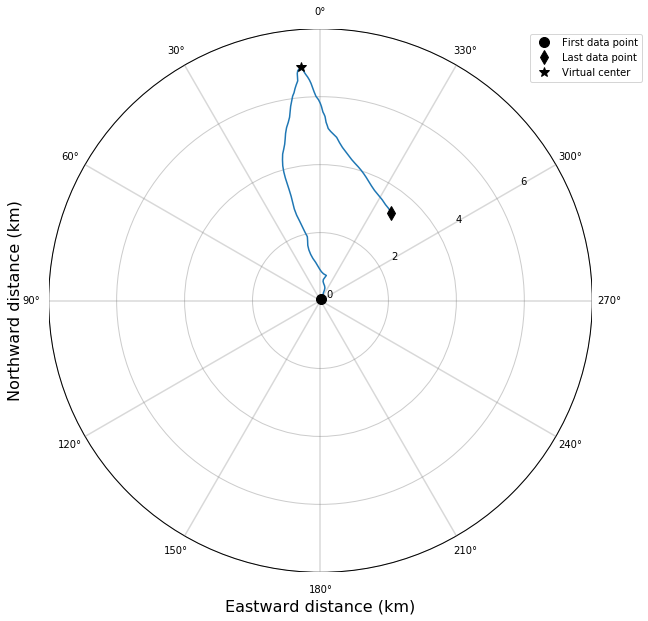

In [191]:
deltat = np.mean(np.array([(ADCP['dates'][i]-ADCP['dates'][i-1]).total_seconds() for i in range(1,len(ADCP['dates']))]))
Hodograph(mU,mV,deltat)
plt.show()

In [192]:
## Simulation of solid rotation data
# Case of 1 cylinder in solid rotation crossed exactly the center
omega = np.pi/1000000 # Rotation speed
r = np.arange(100e3,-100e3,-100)
v = r*np.tan(omega)
u1 = -np.random.uniform(0,0.03,len(r))
u = np.zeros((len(r),))
deltat = 30

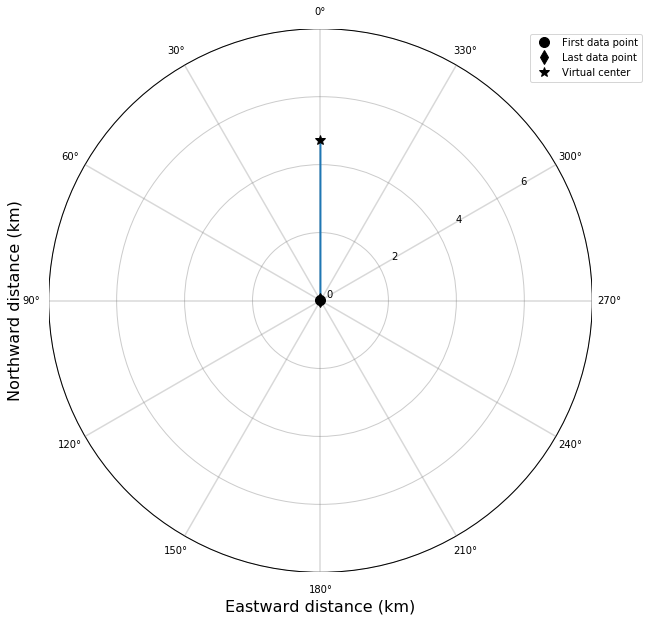

In [197]:
# solid rotation going through the center
ho1 = Hodograph(u,v,deltat)
plt.show()

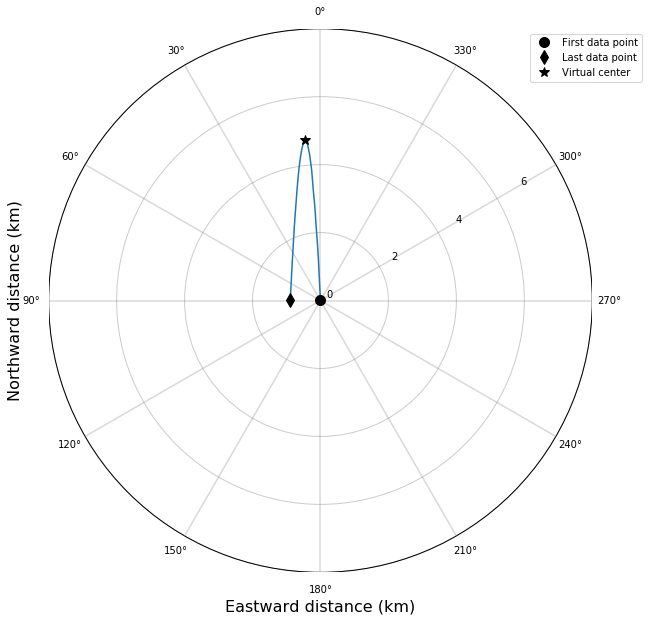

In [198]:
# Quasi solid rotation going through the center
ho2 = Hodograph(u1,v,deltat)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


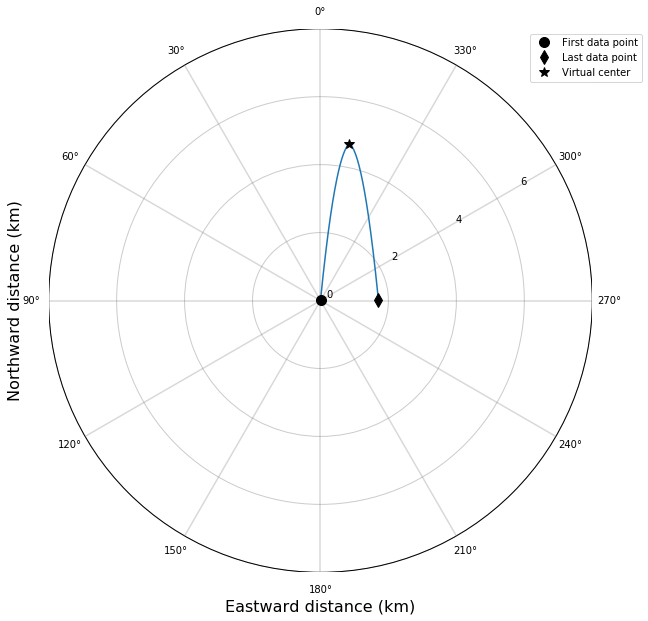

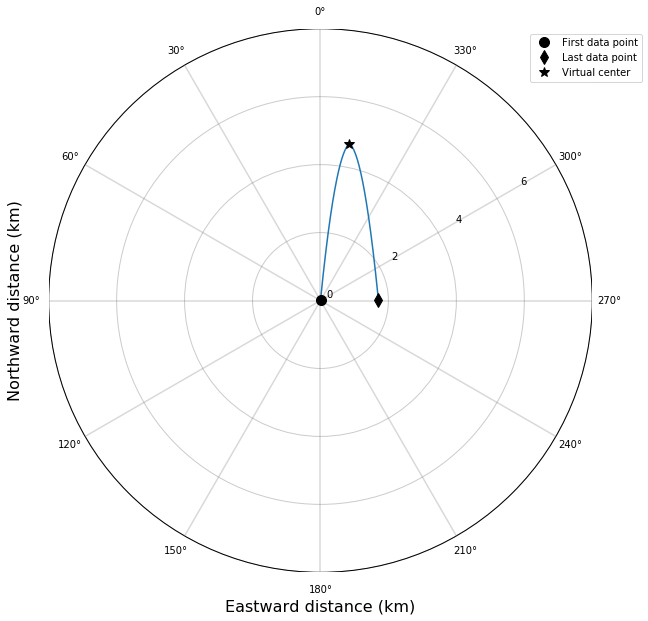

In [205]:
# Now solid rotation but not passing through the center
omega = np.pi/1000000 # Rotation speed
offset = -10000 # 5km south of the center, EW section
x = np.arange(100e3,-100e3,-100)
r = np.sqrt(x**2 + offset**2)
v = x*np.tan(omega) # velocities on a line crossing the center
vp = np.sin(np.arctan(offset/x) + np.pi/2) * v
up = np.cos(np.arctan(offset/x) + np.pi/2) * v
deltat = 30
Hodograph(up,vp,deltat)

In [202]:
r

array([100124.9219725 , 100025.04686327,  99925.17200385, ...,
        99825.297395  ,  99925.17200385, 100025.04686327])

In [200]:
r

array([100000.,  99900.,  99800., ..., -99700., -99800., -99900.])